In [10]:
# 引入mnist
from sklearn.datasets import fetch_openml
import numpy as np
Fashion_mnist = fetch_openml('Fashion-MNIST')

In [11]:
Fashion_mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['9', '0', '0', ..., '8', '1', '5'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [5]:
Fashion_mnist.target = Fashion_mnist.target.astype(np.int8)

In [14]:
np.unique(Fashion_mnist['target'])

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [15]:
x,y = Fashion_mnist['data'],Fashion_mnist['target']

In [16]:
import matplotlib
import matplotlib.pyplot as plt

In [26]:
y[36030]

'3'

In [27]:
digit = x[36030]

In [28]:
digit_image = digit.reshape(28,28)

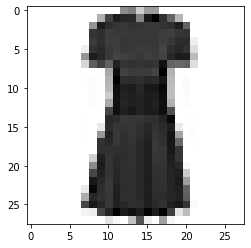

In [29]:
# 將彩色字白黑化
plt.imshow(digit_image,cmap = matplotlib.cm.binary)
# plt.axis('off')
plt.show()

In [139]:
x_train,x_test,y_train,y_test = x[:6000],x[6000:],y[:6000],y[6000:];#[開始（含）：到這之前（不含）]

In [140]:
shuffling_index = np.random.permutation(6000)

In [141]:
x_train,y_train = x[shuffling_index],y[shuffling_index]

In [142]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(x_train,y_train)
svm_classifier.predict([digit])

array([1], dtype=int8)

In [143]:
digit_scores = svm_classifier.decision_function([digit])
digit_scores

array([[-0.30534224,  9.31083089,  3.78110252,  8.26173409,  2.7809031 ,
         2.94550952,  0.75527931,  7.13049879,  6.05985397,  3.87059465]])

In [144]:
# 使用sgd_classifier驗證對錯
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42, max_iter=1000)
sgd_classifier.fit(x_train,y_train)

SGDClassifier(random_state=42)

In [145]:
sgd_classifier.predict([digit])

array([1], dtype=int8)

In [146]:
sgd_classifier.decision_function([digit])

array([[-1054234.50808647,   204317.25097175,  -222148.95083602,
         -120886.79000911,  -276827.75220156,   -94433.72349476,
         -419741.35811304,  -440491.9826093 ,  -254428.79343044,
         -113211.75761209]])

In [147]:
cross_val_score(sgd_classifier,x_train,y_train,cv = 3,scoring = "accuracy")

array([0.864 , 0.8465, 0.868 ])

In [148]:
#confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_classifier,x_train,y_train, cv = 3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[568,   0,   5,   4,   1,   3,   2,   3,   4,   2],
       [  3, 629,   8,   6,   2,   6,   1,   3,  13,   0],
       [  9,   6, 482,  28,  10,   1,   9,  13,  19,   4],
       [  5,   3,  24, 523,   2,  16,   2,  11,  16,   6],
       [  0,   8,   9,   6, 540,   4,  13,  10,  17,  16],
       [  7,   3,  11,  46,   9, 381,  13,   3,  32,   9],
       [  5,   1,  11,   3,   4,   7, 569,   0,   8,   0],
       [  4,   5,   8,  14,   6,   0,   2, 594,   4,  14],
       [  4,  13,  14,  39,   7,  20,  12,   5, 430,   7],
       [  5,   5,   6,  21,  24,   5,   2,  76,  16, 441]])

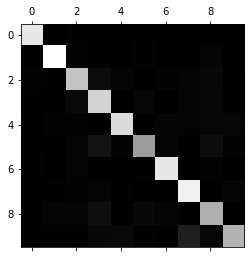

In [149]:
# 主對角線為分類正確的值
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

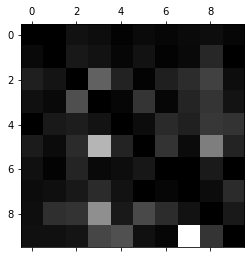

In [150]:
# 錯誤的分類
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [151]:
# Data Augmentation
from scipy.ndimage.interpolation import shift

def shift_image(digit_image, dx, dy):
    digit_image = digit_image.reshape((28, 28))
    shifted_image = shift(digit_image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [152]:
# Creating Augmented Dataset
x_train_augmented = [digit_image for digit_image in x_train]
y_train_augmented = [digit_image for digit_image in y_train]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
     for digit_image, label in zip(x_train, y_train):
             x_train_augmented.append(shift_image(digit_image, dx, dy))
             y_train_augmented.append(label)

In [112]:
# Shuffle the dataset
shuffle_idx = np.random.permutation(len(x_train_augmented))
x_train_augmented = np.array(x_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]

In [113]:
# Training on augmented dataset
sgd_classifier_for_augmented = SGDClassifier(random_state=42, max_iter=1000)
sgd_classifier_for_augmented.fit(x_train_augmented,y_train_augmented)

SGDClassifier(random_state=42)

In [170]:
# Evaluating the model
from sklearn.metrics import accuracy_score
y_pred = sgd_classifier.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy score before Data Augmentation:", score)

y_pred_after_augmented = sgd_classifier_for_augmented.predict(x_test)
score = accuracy_score(y_test, y_pred_after_augmented)
print("Accuracy score after Data Augmentation:", score)

Accuracy score before Data Augmentation: 0.860765625
Accuracy score after Data Augmentation: 0.866828125
